In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('ad.csv')

In [41]:
pd.crosstab( df['ad_id'], df['action'])

action,0,1
ad_id,,
A,696,304
B,628,372


In [42]:
372 - 304
# так ????

68

In [131]:
pd.crosstab( df['ad_id'], df['action'], normalize=True)

action,0,1
ad_id,,
A,0.348,0.152
B,0.314,0.186


In [44]:
0.186 - 0.152 
# или так ????

0.034

In [ ]:
# применяем t-test
# alpha 0.05
alpha = 0.05

In [178]:
N1 = 1000
N2 = 1000

In [179]:
p1 = 304 / N1
p2 = 372 / N2

In [180]:
print(p1, p2)

0.304 0.372


In [181]:
# H0: p2 = p1, или что то же самое p2 - p1 = 0
# H1: p2 > p1
p2 - p1

0.068

In [182]:
p_hat = (304+334) / (N1+N2)

In [183]:
p_hat

0.319

In [184]:
var = p_hat*(1-p_hat) * (1/N1 + 1/N2)

In [185]:
import numpy as np
se = np.sqrt(var)

In [186]:
se

0.020844135865993582

In [187]:
print(p_hat - 1.96*se, p_hat + 1.96*se ) # 99% дов. инт.

0.27814549370265257 0.35985450629734744


In [125]:
# t-test
t_score = (p2 - p1)/se

In [126]:
t_score

1.2071209999720518

In [127]:
import scipy.stats as stats

In [128]:
stats.norm.cdf(t_score)

0.8863072257048407

In [129]:
p_value = 1 - stats.t.cdf(t_score, df=N1+N2-2)

In [130]:
p_value

0.11369991308174598

In [97]:

p_value > alpha

True

In [98]:
# sampling

In [136]:
# bootstrap
df2 = df.sample(2000, replace=True)

In [139]:
pd.crosstab( df['ad_id'], df['action'])

action,0,1
ad_id,,
A,696,304
B,628,372


In [140]:
pd.crosstab(df2['ad_id'], df2['action'])

action,0,1
ad_id,,
A,725,310
B,617,348


In [142]:
np.mean(df.action[df.ad_id=='A'])

0.304

In [174]:
a = []
b = []
for _ in range(5000):
    df2 = df.sample(2000, replace=True)
    a.append( np.mean ( df2.action[df2.ad_id=='A'] ) )
    b.append( np.mean ( df2.action[df2.ad_id=='B'] ) )


In [175]:
df3 = pd.DataFrame(np.array([a,b]).T, columns = ['a','b'])
df3['d'] = df3['b'] - df3['a']
df3.describe()

,a,b,d
count,5000.000000,5000.000000,5000.000000
mean,0.303993,0.371831,0.067839
std,0.014347,0.015675,0.021327
min,0.255791,0.320329,-0.003608
25%,0.294355,0.361277,0.053097
50%,0.303785,0.371834,0.068014
75%,0.313609,0.382324,0.082503
max,0.358240,0.426311,0.153506


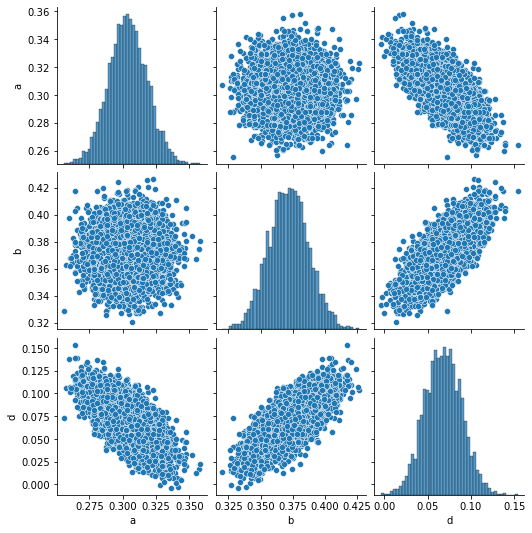

In [176]:
import seaborn as sns
sns.pairplot(df3)

In [177]:
print(df3['d'].quantile(0.025), df3['d'].quantile(0.975))

0.02694482723366522 0.10917866867318814


In [221]:
z = np.random.normal(size=(4,3))
z

array([[ 1.01497089, -1.36295957,  1.01505205],
       [ 2.41675294,  0.63546734,  0.0556931 ],
       [-0.85167361, -0.21073144,  0.21383124],
       [-0.59146338,  1.02492692, -0.24059954]])

In [232]:
z[:,2] > 0

array([ True,  True,  True, False])

In [238]:
z[ z[:,2] > 0,:]

array([[ 1.01497089,  1.01505205],
       [ 2.41675294,  0.0556931 ],
       [-0.85167361,  0.21383124]])